In [1]:
# Data Handling & Visualization
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns  

# Machine Learning Models
from sklearn.model_selection import train_test_split  
from sklearn.linear_model import LinearRegression  
from sklearn.ensemble import RandomForestRegressor  

# Model Evaluation Metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score  

# (Optional) Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV 

In [2]:
df = pd.read_csv("C:/Users/hp/Downloads/advertising.csv")  # Adjust the path as needed
df.head()  # Display first 5 rows

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [3]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [4]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

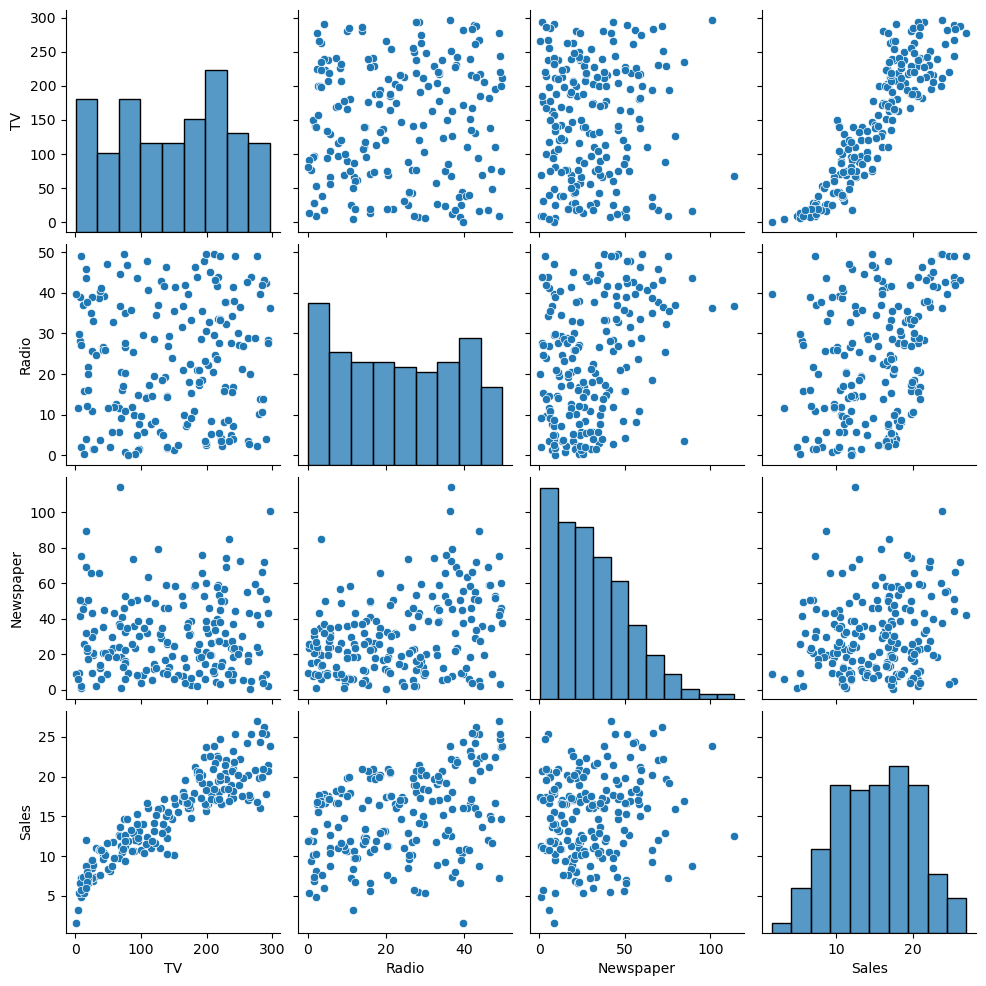

In [5]:
sns.pairplot(df)  # Pairwise scatter plots
plt.show()

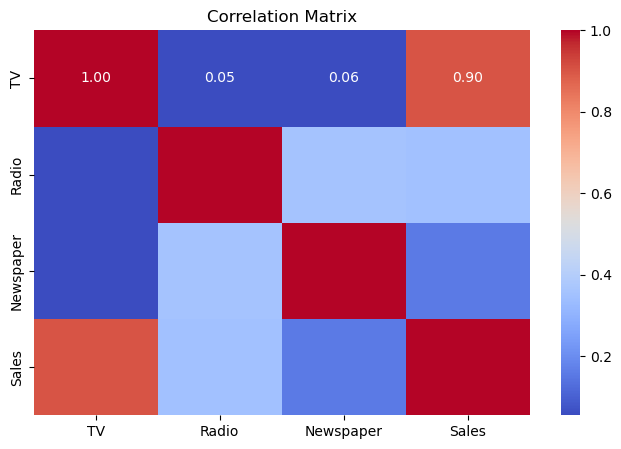

In [6]:
plt.figure(figsize=(8,5))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
# Define features (X) and target variable (y)
X = df[['TV', 'Radio', 'Newspaper']]  # Independent variables
y = df['Sales']  # Dependent variable

# Split data into training (80%) and testing (20%) sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# Import and train the Linear Regression model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)  # Train the model

LinearRegression()

In [10]:
# Predict on test data
y_pred = model.predict(X_test)

In [11]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print results
print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Absolute Error: 1.27
Mean Squared Error: 2.91
R² Score: 0.91


In [12]:
y_pred = model.predict(X_test)  
print(y_pred[:10])  # Show first 10 predictions

[17.0347724  20.40974033 23.72398873  9.27278518 21.68271879 12.56940161
 21.08119452  8.69035045 17.23701254 16.66657475]


In [13]:
print(y_test[:10].values)  # Show first 10 actual sales values

[16.9 22.4 21.4  7.3 24.7 12.6 22.3  8.4 16.5 16.1]


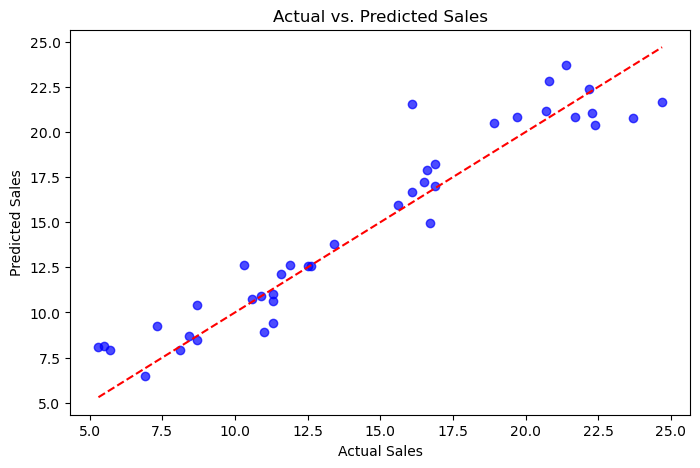

In [14]:

plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred, color='blue', alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='dashed')
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs. Predicted Sales")
plt.show()

In [15]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [16]:
# Predict using Random Forest
rf_y_pred = rf_model.predict(X_test)

# Calculate error metrics for Random Forest
rf_mae = mean_absolute_error(y_test, rf_y_pred)
rf_mse = mean_squared_error(y_test, rf_y_pred)
rf_r2 = r2_score(y_test, rf_y_pred)

# Print results
print(f"Random Forest MAE: {rf_mae:.2f}")
print(f"Random Forest MSE: {rf_mse:.2f}")
print(f"Random Forest R² Score: {rf_r2:.2f}")

Random Forest MAE: 0.92
Random Forest MSE: 1.44
Random Forest R² Score: 0.95


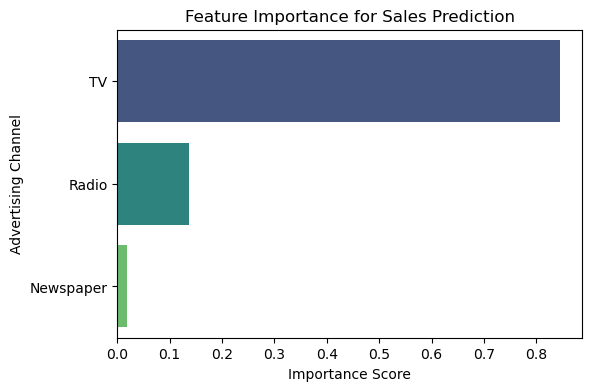

In [17]:
# Get feature importance from the Random Forest model
import matplotlib.pyplot as plt
import seaborn as sns

feature_importance = rf_model.feature_importances_

# Create a DataFrame to display feature importance
feature_names = X.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Fixed the warning: Set hue=None and disable legend
plt.figure(figsize=(6,4))
sns.barplot(x=importance_df['Importance'], y=importance_df['Feature'], palette='viridis' )
plt.xlabel('Importance Score')
plt.ylabel('Advertising Channel')
plt.title('Feature Importance for Sales Prediction')
plt.show()

In [19]:
#Example: Random advertising budget inputs
sample_data = np.array([[250, 30, 20],   # High TV, low Radio, low Newspaper
                        [50, 80, 50],    # Low TV, high Radio, mid Newspaper
                        [200, 10, 5],    # High TV, very low Radio & Newspaper
                        [10, 50, 90]])   # Very low TV, high Newspaper

# Convert to DataFrame with correct column names
sample_df = pd.DataFrame(sample_data, columns=['TV', 'Radio', 'Newspaper'])

# Predict sales
predicted_sales = rf_model.predict(sample_df)

# Display results
for i, (tv, radio, newspaper, pred) in enumerate(zip(sample_data[:,0], sample_data[:,1], sample_data[:,2], predicted_sales)):
    print(f"Scenario {i+1}: TV = {tv}, Radio = {radio}, Newspaper = {newspaper} → Predicted Sales: {pred:.2f}")

Scenario 1: TV = 250, Radio = 30, Newspaper = 20 → Predicted Sales: 19.79
Scenario 2: TV = 50, Radio = 80, Newspaper = 50 → Predicted Sales: 11.71
Scenario 3: TV = 200, Radio = 10, Newspaper = 5 → Predicted Sales: 18.09
Scenario 4: TV = 10, Radio = 50, Newspaper = 90 → Predicted Sales: 7.37


In [20]:
import joblib

# Save the trained model
joblib.dump(rf_model, "sales_prediction_model.pkl")

print(" Model saved as sales_prediction_model.pkl")

 Model saved as sales_prediction_model.pkl


In [21]:
# New sample data for testing
new_test_data = np.array([
    [300, 20, 10],  # Very high TV, low Radio/Newspaper
    [100, 100, 20], # Balanced TV & Radio, low Newspaper
    [50, 200, 50],  # Low TV, very high Radio, medium Newspaper
    [250, 5, 5],    # High TV, almost no Radio/Newspaper
    [10, 10, 100]   # Very low TV/Radio, high Newspaper
])

# Convert to DataFrame
new_test_df = pd.DataFrame(new_test_data, columns=['TV', 'Radio', 'Newspaper'])

# Predict sales using the trained Random Forest model
new_predictions = rf_model.predict(new_test_df)

# Display results
for i, (tv, radio, newspaper, pred) in enumerate(zip(new_test_data[:,0], new_test_data[:,1], new_test_data[:,2], new_predictions)):
    print(f"Scenario {i+1}: TV = {tv}, Radio = {radio}, Newspaper = {newspaper} → Predicted Sales: {pred:.2f}")

Scenario 1: TV = 300, Radio = 20, Newspaper = 10 → Predicted Sales: 20.24
Scenario 2: TV = 100, Radio = 100, Newspaper = 20 → Predicted Sales: 15.07
Scenario 3: TV = 50, Radio = 200, Newspaper = 50 → Predicted Sales: 11.71
Scenario 4: TV = 250, Radio = 5, Newspaper = 5 → Predicted Sales: 17.16
Scenario 5: TV = 10, Radio = 10, Newspaper = 100 → Predicted Sales: 6.16
